<a href="https://colab.research.google.com/github/herbert0419/TSF_Assignments_Task-1/blob/main/Seismic_Bumps_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import scipy
from scipy.io import arff
from scipy import stats
import joblib

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, StratifiedKFold, cross_validate, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
df = pd.read_csv('/content/csv_result-seismic-bumps .csv')

In [ ]:
df.head()

,id,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,1,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,2,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,3,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,4,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,5,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

id                0
seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

In [ ]:
df.describe

<bound method NDFrame.describe of         id seismic seismoacoustic shift  genergy  gpuls  gdenergy  gdpuls  \
0        1       a              a     N    15180     48       -72     -72   
1        2       a              a     N    14720     33       -70     -79   
2        3       a              a     N     8050     30       -81     -78   
3        4       a              a     N    28820    171       -23      40   
4        5       a              a     N    12640     57       -63     -52   
...    ...     ...            ...   ...      ...    ...       ...     ...   
2579  2580       b              a     W    81410    785       432     151   
2580  2581       b              a     W    42110    555       213     118   
2581  2582       b              a     W    26960    540       101     112   
2582  2583       a              a     W    16130    322         2       2   
2583  2584       a              a     W    12750    235       -10     -10   

     ghazard  nbumps  nbumps2  nbumps3  n

In [ ]:
df.describe()

,id,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2584.000000,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,1292.500000,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,746.080871,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,646.750000,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,1292.500000,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,1938.250000,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2584.000000,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


In [ ]:
df.shape

(2584, 20)

In [ ]:
df.columns

Index(['id', 'seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls',
       'gdenergy', 'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3',
       'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy',
       'maxenergy', 'class'],
      dtype='object')

In [ ]:
label = 'class'
col_list_categorical = ['seismic', 'seismoacoustic', 'shift', 'ghazard']
col_list_numerical = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']
col_list_discrete = ['nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89']
len([label]) + len(col_list_categorical) + len(col_list_discrete) + len(col_list_numerical)

19

In [ ]:
df.dtypes

id                 int64
seismic           object
seismoacoustic    object
shift             object
genergy            int64
gpuls              int64
gdenergy           int64
gdpuls             int64
ghazard           object
nbumps             int64
nbumps2            int64
nbumps3            int64
nbumps4            int64
nbumps5            int64
nbumps6            int64
nbumps7            int64
nbumps89           int64
energy             int64
maxenergy          int64
class              int64
dtype: object

In [ ]:
df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2584 non-null   int64 
 1   seismic         2584 non-null   object
 2   seismoacoustic  2584 non-null   object
 3   shift           2584 non-null   object
 4   genergy         2584 non-null   int64 
 5   gpuls           2584 non-null   int64 
 6   gdenergy        2584 non-null   int64 
 7   gdpuls          2584 non-null   int64 
 8   ghazard         2584 non-null   object
 9   nbumps          2584 non-null   int64 
 10  nbumps2         2584 non-null   int64 
 11  nbumps3         2584 non-null   int64 
 12  nbumps4         2584 non-null   int64 
 13  nbumps5         2584 non-null   int64 
 14  nbumps6         2584 non-null   int64 
 15  nbumps7         2584 non-null   int64 
 16  nbumps89        2584 non-null   int64 
 17  energy          2584 non-null   int64 
 18  maxenerg

In [ ]:
df.columns

Index(['id', 'seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls',
       'gdenergy', 'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3',
       'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy',
       'maxenergy', 'class'],
      dtype='object')

In [ ]:
df_raw = df.copy(deep=True)

In [ ]:
df['class'].value_counts() * 100 /len(df['class'])


0    93.421053
1     6.578947
Name: class, dtype: float64

(None, None)

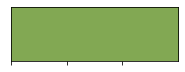

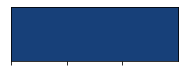

In [ ]:
colors = sns.color_palette([sns.color_palette("gist_earth_r")[2], sns.color_palette("gist_earth_r")[5]])
sns.palplot(sns.color_palette("gist_earth_r")[2]), sns.palplot(sns.color_palette("gist_earth_r")[5])

Text(0, 0.5, 'COUNT')

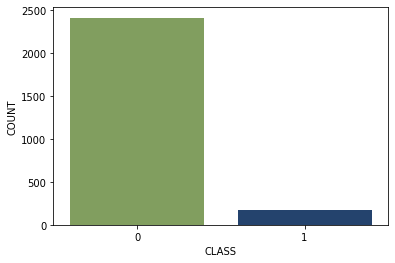

In [ ]:
sns.countplot(x=label, data=df, palette=colors)
plt.xlabel('CLASS')
plt.ylabel('COUNT')

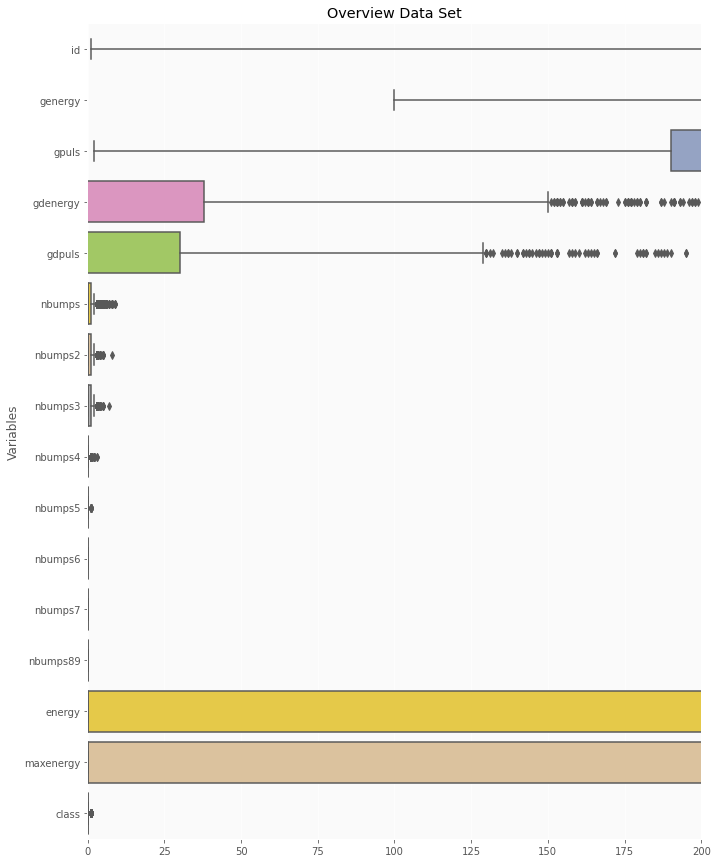

In [ ]:
plt.style.use('ggplot')  

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

In [ ]:
def one_hot_encoder(col_name, df):
    label_encoder = LabelEncoder()
    onehot_encoder = OneHotEncoder(drop='first', sparse=False)
    try:
        encoded_array = label_encoder.fit_transform(df[col_name])
#         SKLEARN IMPLEMENTATION
        encoded_array_reshaped = encoded_array.reshape(len(encoded_array), 1)
        one_hot_encoded_array = onehot_encoder.fit_transform(encoded_array_reshaped)
#         one_hot_encoded_array = to_categorical(encoded_array)
        print(one_hot_encoded_array)
        num_features = one_hot_encoded_array.shape[1]
        print("Number of encoded columns to add: ", num_features)
        new_enc_col_names = [col + '_enc_' + str(num) for num in range(0, num_features)] 
        df_enc = pd.DataFrame(one_hot_encoded_array)
        print("Shape of encoded df: ", df_enc.shape)
        df_enc.columns = new_enc_col_names
        print("New column names: ", new_enc_col_names)
        df = pd.concat([df, df_enc], axis=1)
        df.drop(columns=col, inplace=True)
        return df
    except Exception as e:
        print(e)
        print("Error in encoding feature : " + col_name)

In [ ]:
for col in col_list_categorical:
    df = one_hot_encoder(col, df)
df.shape

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
Number of encoded columns to add:  1
Shape of encoded df:  (2584, 1)
New column names:  ['seismic_enc_0']
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
Number of encoded columns to add:  2
Shape of encoded df:  (2584, 2)
New column names:  ['seismoacoustic_enc_0', 'seismoacoustic_enc_1']
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
Number of encoded columns to add:  1
Shape of encoded df:  (2584, 1)
New column names:  ['shift_enc_0']
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
Number of encoded columns to add:  2
Shape of encoded df:  (2584, 2)
New column names:  ['ghazard_enc_0', 'ghazard_enc_1']


(2584, 22)

In [ ]:
df.head()

,id,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class,seismic_enc_0,seismoacoustic_enc_0,seismoacoustic_enc_1,shift_enc_0,ghazard_enc_0,ghazard_enc_1
0,1,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,14720,33,-70,-79,1,0,1,0,0,0,0,0,2000,2000,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,28820,171,-23,40,1,0,1,0,0,0,0,0,3000,3000,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2584 non-null   int64  
 1   genergy               2584 non-null   int64  
 2   gpuls                 2584 non-null   int64  
 3   gdenergy              2584 non-null   int64  
 4   gdpuls                2584 non-null   int64  
 5   nbumps                2584 non-null   int64  
 6   nbumps2               2584 non-null   int64  
 7   nbumps3               2584 non-null   int64  
 8   nbumps4               2584 non-null   int64  
 9   nbumps5               2584 non-null   int64  
 10  nbumps6               2584 non-null   int64  
 11  nbumps7               2584 non-null   int64  
 12  nbumps89              2584 non-null   int64  
 13  energy                2584 non-null   int64  
 14  maxenergy             2584 non-null   int64  
 15  class                

In [ ]:
df[col_list_numerical].describe()

,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,4975.270898,4278.850619
std,2.292005e+05,562.652536,80.319051,63.166556,20450.833222,19357.454882
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,2600.000000,2000.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,402000.000000,400000.000000


In [ ]:
df.describe()

,id,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class,seismic_enc_0,seismoacoustic_enc_0,seismoacoustic_enc_1,shift_enc_0,ghazard_enc_0,ghazard_enc_1
count,2584.000000,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,1292.500000,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789,0.349071,0.369969,0.018576,0.643576,0.082043,0.011610
std,746.080871,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962,0.476769,0.482889,0.135048,0.479035,0.274484,0.107143
min,1.000000,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,646.750000,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1292.500000,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1938.250000,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2584.000000,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

df_corr = df[col_list_numerical].corr()

In [ ]:
df_corr

,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy
genergy,1.000000,0.748020,0.048514,0.071554,0.080828,0.064405
gpuls,0.748020,1.000000,0.293036,0.382906,0.187350,0.164263
gdenergy,0.048514,0.293036,1.000000,0.811944,0.105971,0.108572
gdpuls,0.071554,0.382906,0.811944,1.000000,0.143277,0.143646
energy,0.080828,0.187350,0.105971,0.143277,1.000000,0.989547
maxenergy,0.064405,0.164263,0.108572,0.143646,0.989547,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

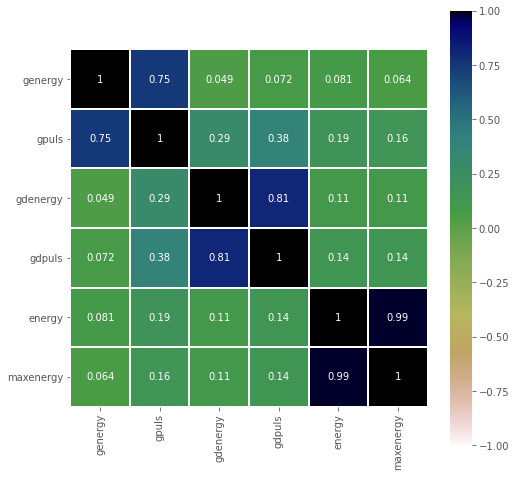

In [ ]:
plt.figure(figsize=[8, 8])
sns.heatmap(data=df_corr, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


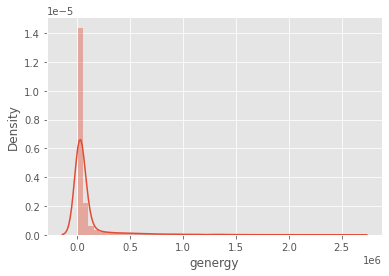

In [ ]:
sns.distplot(df['genergy'], hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


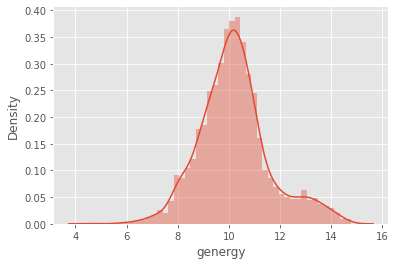

In [ ]:
sns.distplot(np.log(df['genergy']), hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


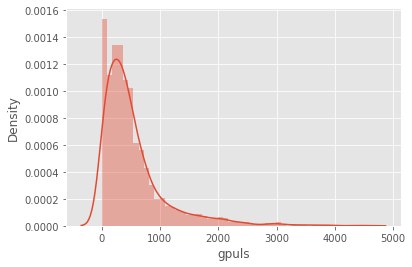

In [ ]:

sns.distplot(df['gpuls'], hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


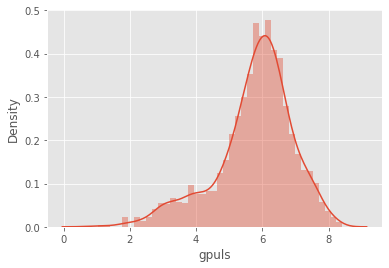

In [ ]:

sns.distplot(np.log(df['gpuls']), hist=True)

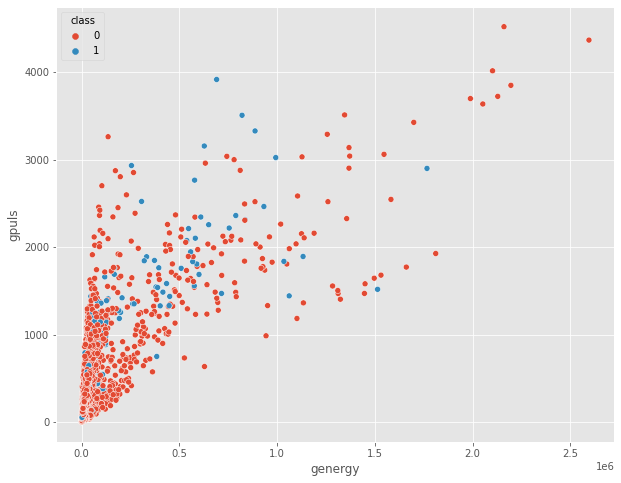

In [ ]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='genergy', y='gpuls', hue='class', data=df)

In [ ]:
df['log_t_genergy'] = np.log(df['genergy'])
df['log_t_gpuls'] = np.log(df['gpuls'])

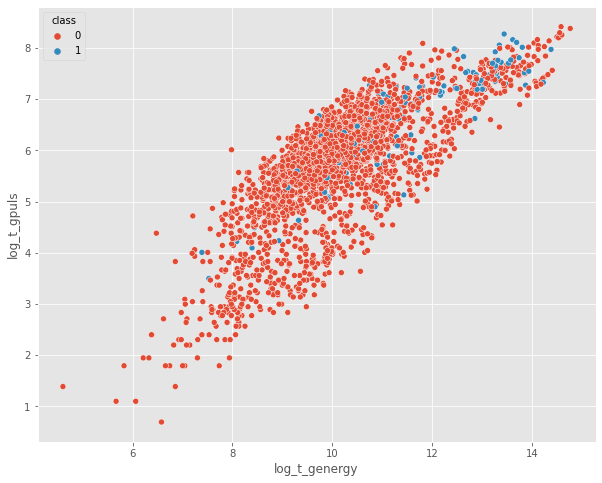

In [ ]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='log_t_genergy', y='log_t_gpuls', hue='class', data=df)

In [ ]:
df.drop(columns=['log_t_genergy', 'log_t_gpuls'], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


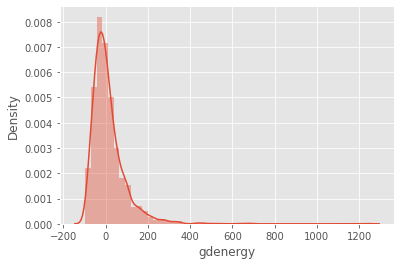

In [ ]:
sns.distplot(df['gdenergy'], hist=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


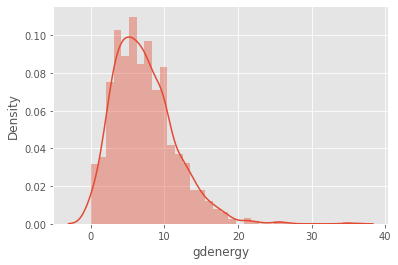

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


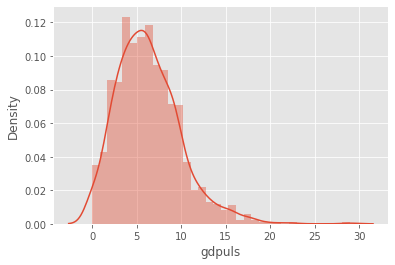

In [ ]:

sns.distplot(np.sqrt(df['gdenergy']), hist=True)
plt.show()
sns.distplot(np.sqrt(df['gdpuls']), hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


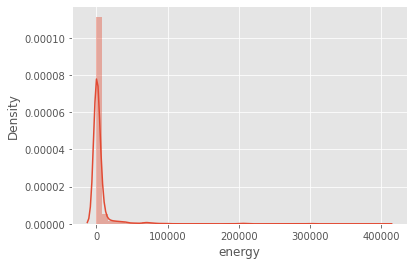

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


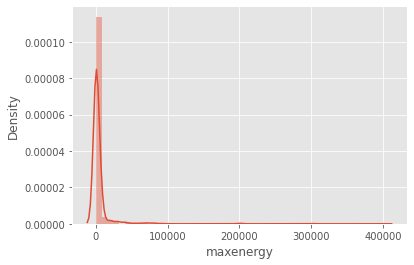

In [ ]:

sns.distplot(df['energy'], hist=True)
plt.show()
sns.distplot(df['maxenergy'], hist=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


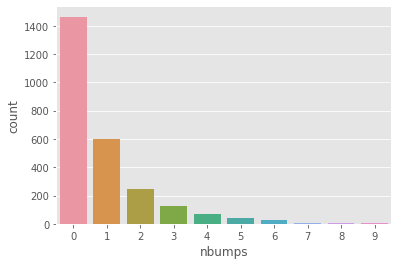

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


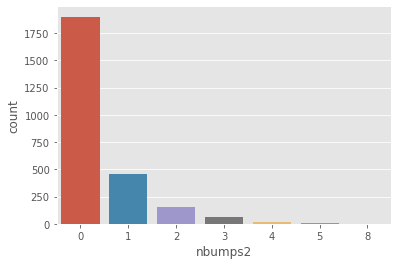

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


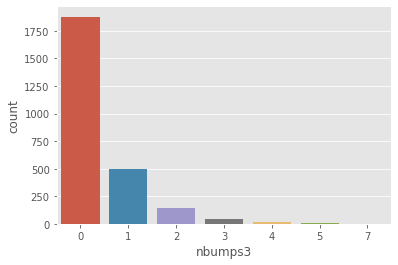

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


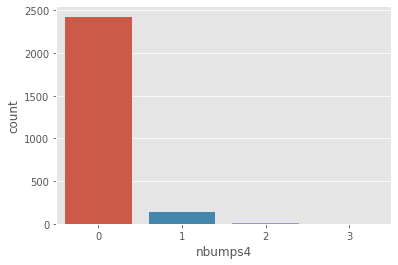

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


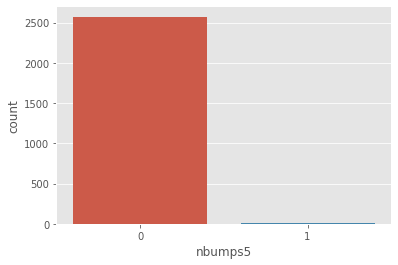

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


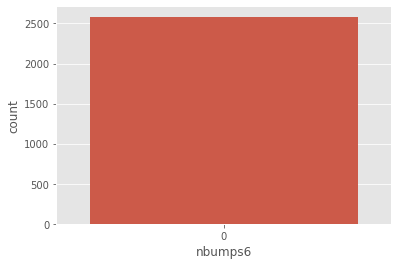

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


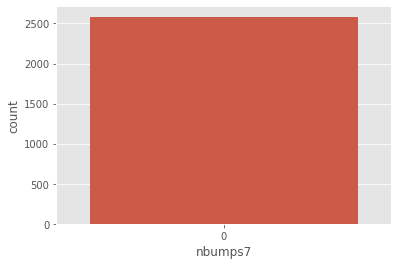

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


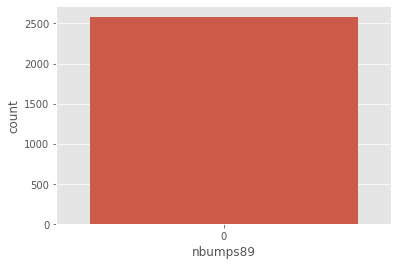

In [ ]:
for col in col_list_discrete:
    sns.countplot(df[col])
    plt.show()

In [ ]:
df.drop(columns=['nbumps6', 'nbumps7', 'nbumps89'], inplace=True)

In [ ]:
col_list_discrete = list(set(col_list_discrete) - set(['nbumps6', 'nbumps7', 'nbumps89']))
col_list_discrete

['nbumps3', 'nbumps5', 'nbumps2', 'nbumps4', 'nbumps']

In [ ]:
for each_col in col_list_discrete:
    data_crosstab = pd.crosstab(df[each_col], df[label], colnames=['class'])
    print(data_crosstab)
    print('-----')

class       0   1
nbumps3          
0        1806  73
1         442  55
2         115  25
3          35   7
4          12   8
5           3   2
7           1   0
-----
class       0    1
nbumps5           
0        2403  169
1          11    1
-----
class       0   1
nbumps2          
0        1832  69
1         399  56
2         122  29
3          47  11
4           8   4
5           5   1
8           1   0
-----
class       0    1
nbumps4           
0        2278  148
1         123   20
2          12    1
3           1    1
-----
class      0   1
nbumps          
0       1424  40
1        567  31
2        208  37
3         96  31
4         59  10
5         30   8
6         19   9
7          3   2
8          6   1
9          2   1
-----


In [ ]:



df.shape

(2584, 19)

In [ ]:
df.head()

,id,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class,seismic_enc_0,seismoacoustic_enc_0,seismoacoustic_enc_1,shift_enc_0,ghazard_enc_0,ghazard_enc_1
0,1,15180,48,-72,-72,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,14720,33,-70,-79,1,0,1,0,0,2000,2000,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,8050,30,-81,-78,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,28820,171,-23,40,1,0,1,0,0,3000,3000,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12640,57,-63,-52,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list(set(df.columns) - set([label]))

['gdenergy',
 'maxenergy',
 'nbumps3',
 'ghazard_enc_0',
 'genergy',
 'seismoacoustic_enc_0',
 'seismic_enc_0',
 'shift_enc_0',
 'gdpuls',
 'ghazard_enc_1',
 'id',
 'seismoacoustic_enc_1',
 'nbumps5',
 'nbumps2',
 'gpuls',
 'energy',
 'nbumps4',
 'nbumps']

In [ ]:
X = df[list(set(df.columns) - set([label]))].values
y = df[label]
X.shape, y.shape

((2584, 18), (2584,))

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2579    0
2580    0
2581    0
2582    0
2583    0
Name: class, Length: 2584, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten

In [ ]:
model = Sequential()
model.add(Dense(32,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [ ]:
pre=model.predict(X_test)

In [ ]:
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test,y_test, verbose=0)
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                608       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8

In [ ]:
def plot_roc(y_pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

Epoch 1/10
65/65 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9308 - val_loss: nan - val_accuracy: 0.9478
Epoch 2/10
65/65 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9308 - val_loss: nan - val_accuracy: 0.9478
Epoch 3/10
65/65 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9308 - val_loss: nan - val_accuracy: 0.9478
Epoch 4/10
65/65 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9308 - val_loss: nan - val_accuracy: 0.9478
Epoch 5/10
65/65 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9308 - val_loss: nan - val_accuracy: 0.9478
Epoch 6/10
65/65 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9308 - val_loss: nan - val_accuracy: 0.9478
Epoch 7/10
65/65 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9308 - val_loss: nan - val_accuracy: 0.9478
Epoch 8/10
65/65 [==============================] - 0s 3ms/ste

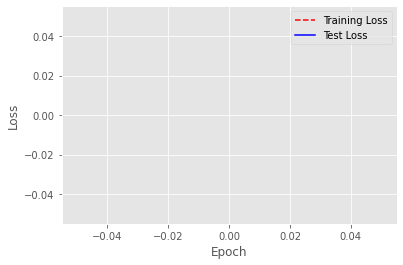

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10, verbose=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();